In [1]:
!git clone https://github.com/dmc27/missing_pixels.git

fatal: destination path 'missing_pixels' already exists and is not an empty directory.


In [2]:
from os import listdir
from os.path import isfile
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from utils import *

In [3]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

random.seed(42)

# Data Preparation

In [10]:
img_path = "datasets"
img_fnames = [f for f in listdir(img_path) if isfile(join(img_path, f))]
img_fnames = random.choices(img_fnames, k=1000)
print(img_fnames[:20])

['64e569cd-937d-499a-a8e0-abccecf0c44d.JPEG', 'b86a6859-d9f9-49b5-928c-893e8d58e687.JPEG', 'c8e6fc12-461e-4567-aab3-388e283714c2.JPEG', '8c20a2cc-a727-47ba-9abb-6a8cff04a12f.JPEG', '6fb3e768-5ee1-46ed-879d-1d3570c9a5bb.JPEG', '0affa748-e02c-4dcc-b52f-c542cce9bc34.JPEG', '96f349e1-88a5-4c45-b53a-29d8a4aa0dbd.JPEG', '95c033ce-bebc-411a-a810-64fe52ada0f1.JPEG', 'a873876f-0294-4354-9887-53975d69527e.JPEG', 'd3bc7970-b63f-4c00-bd49-73625179fef8.JPEG', 'f1695f4f-04ef-4556-b026-c1a7631b8b62.JPEG', 'c2b80754-d7c6-47da-b21e-fc092475ae93.JPEG', 'e83f566d-c7b4-4471-a51a-0ed6221951c7.JPEG', '5cb5ab5a-af1e-4398-8ad0-8433be19baa8.JPEG', 'a024fcfb-4f64-41e8-8b04-cb09dd3cdd4e.JPEG', 'd8417ec0-4633-40a5-9148-e1605ffc73c7.JPEG', 'c8bff267-f6b1-41cb-871b-3e4b42f51ec8.JPEG', '9e1643da-2dfd-421e-b54a-f6ecda4adcb4.JPEG', '173064a4-41c3-43fe-9c38-63884b647f1c.JPEG', '3efb4a54-d449-4e05-a4e1-627d3e76e2f7.JPEG']


In [11]:
inputs = []
targets = []
for img_fname in img_fnames:
    img = cv.imread(join(img_path, img_fname), cv.IMREAD_GRAYSCALE)
    img = img.astype(np.float64)

    do_parse_img(img, inputs, targets)

X_train = np.zeros((len(inputs), NUM_INP_NODES))
y_train = np.zeros((len(targets), NUM_OUT_NODES))
for idx in range(len(inputs)):
    X_train[idx, :] = inputs[idx]
    y_train[idx] = targets[idx]

In [12]:
print(X_train.shape)

(64000, 60)


# Modeling

In [13]:
model_fname = "models/model.mlp.imagenet.h5"

model = Sequential([
    Dense(120, input_shape=(NUM_INP_NODES,), activation="relu"),
    Dense(60, activation="relu"),
    Dense(NUM_OUT_NODES, activation='sigmoid')
])

model.compile(loss="mean_squared_error", optimizer="adam",
              metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               7320      
                                                                 
 dense_1 (Dense)             (None, 60)                7260      
                                                                 
 dense_2 (Dense)             (None, 4)                 244       
                                                                 
Total params: 14824 (57.91 KB)
Trainable params: 14824 (57.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-07-20 15:10:50.016097: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2023-07-20 15:10:50.016123: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2023-07-20 15:10:50.016128: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2023-07-20 15:10:50.016167: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-20 15:10:50.016185: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
checkpoint = ModelCheckpoint(model_fname, monitor='loss', verbose=1,
                             save_best_only=True)
callbacks_list = [checkpoint]

history = model.fit(X_train, y_train, epochs=450, batch_size=512,
                    validation_split=0.1, callbacks=callbacks_list)

Epoch 1/450
110/113 [============================>.] - ETA: 0s - loss: 0.0119 - accuracy: 0.3799
Epoch 1: loss improved from inf to 0.01197, saving model to models/model.mlp.imagenet.h5
113/113 [==============================] - 1s 5ms/step - loss: 0.0120 - accuracy: 0.3807 - val_loss: 0.0120 - val_accuracy: 0.3867
Epoch 2/450
109/113 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.3744
Epoch 2: loss did not improve from 0.01197
113/113 [==============================] - 1s 5ms/step - loss: 0.0122 - accuracy: 0.3739 - val_loss: 0.0125 - val_accuracy: 0.4009
Epoch 3/450
109/113 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.3400
Epoch 3: loss did not improve from 0.01197
113/113 [==============================] - 1s 5ms/step - loss: 0.0169 - accuracy: 0.3399 - val_loss: 0.0118 - val_accuracy: 0.4023
Epoch 4/450
109/113 [===========================>..] - ETA: 0s - loss: 0.0122 - accuracy: 0.3745
Epoch 4: loss did not improve from 0.01197
1

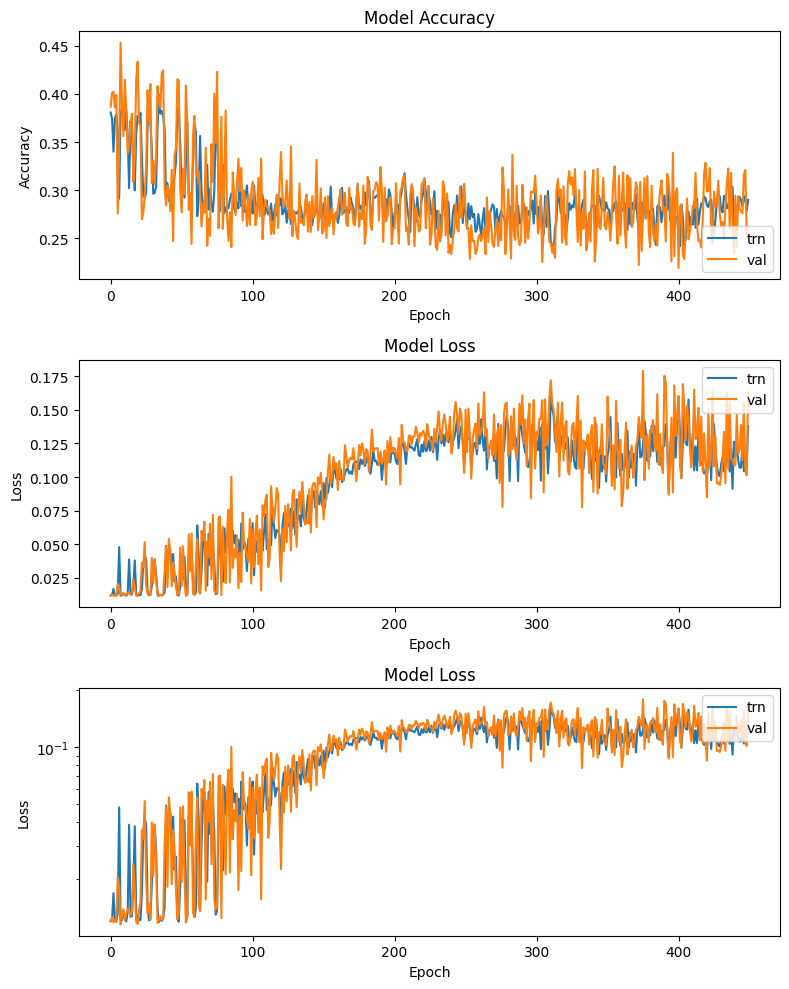

In [16]:
plot_training_history(history)

# Evaluation

32/32 [==============================] - 0s 2ms/step
MSE = 427.26


2023-07-20 15:15:44.032963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


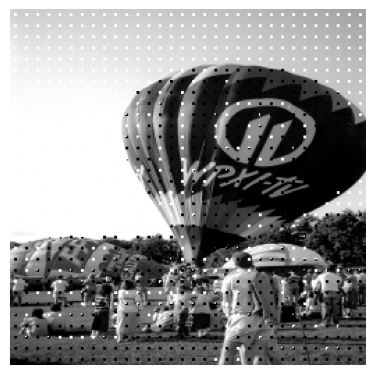

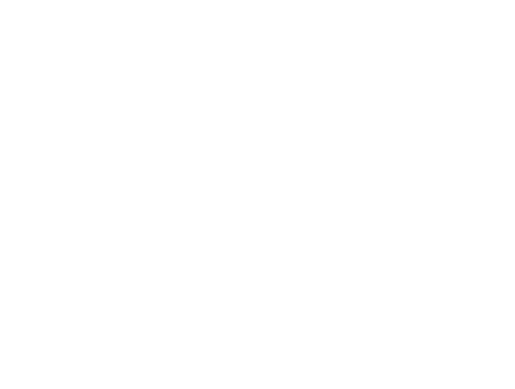

In [17]:
evaluate_mlp(model)